In [1]:
import os
import sys

# os.chdir("..")
sys.path.append(os.getcwd())
os.getcwd()

'/scratch/pmc026/nchoong/run_conda/509057'

In [2]:
import glob

group_dir = os.getenv("MYGROUP")
glob.glob(f"{group_dir}/QuantumTransformer/data/word_embeddings/imdb_train_batch_*.pt")

['/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_0.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_1.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_2.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_3.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_4.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_5.pt',
 '/group/pmc026/nchoong/QuantumTransformer/data/word_embeddings/imdb_train_batch_6.pt']

In [3]:
from transformer.pytorch.main_no_embed import main
from transformer.pytorch.utils.load_dataloader import load_dataloader
from transformer.pytorch.utils.plots import plot_metrics

2024-09-29 12:59:09.152036: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-29 12:59:09.164717: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 12:59:09.179982: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 12:59:09.184634: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-29 12:59:09.196137: I tensorflow/core/platform/cpu_feature_guar

2024-09-29 12:59:11.853906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Please first ``pip install -U qiskit`` to enable related functionality in translation module


In [4]:
from config import dev

dev

device(type='cuda')

In [5]:
import random
import numpy as np
import torch
import tensorflow as tf

In [6]:
seed = 42

os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTEROP_THREADS"] = str(os.cpu_count())
os.environ["TF_NUM_INTRAOP_THREADS"] = str(os.cpu_count())

tf.config.threading.set_intra_op_parallelism_threads(os.cpu_count())
tf.config.threading.set_inter_op_parallelism_threads(os.cpu_count())

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [7]:
train_dataloader, val_dataloader, test_dataloader = load_dataloader("imdb")

Loading train tensors:   0%|          | 0/7 [00:00<?, ?it/s]

Loading train tensors:  14%|█▍        | 1/7 [00:03<00:18,  3.06s/it]

Loading train tensors:  29%|██▊       | 2/7 [00:06<00:15,  3.04s/it]

Loading train tensors:  43%|████▎     | 3/7 [00:09<00:12,  3.04s/it]

Loading train tensors:  57%|█████▋    | 4/7 [00:12<00:09,  3.05s/it]

Loading train tensors:  71%|███████▏  | 5/7 [00:15<00:06,  3.05s/it]

Loading train tensors:  86%|████████▌ | 6/7 [00:18<00:03,  3.04s/it]

Loading train tensors: 100%|██████████| 7/7 [00:19<00:00,  2.55s/it]

Loading train tensors: 100%|██████████| 7/7 [00:19<00:00,  2.83s/it]

Sample size:  5000


Loading val tensors:   0%|          | 0/2 [00:00<?, ?it/s]

Loading val tensors:  50%|█████     | 1/2 [00:03<00:03,  3.05s/it]

Loading val tensors: 100%|██████████| 2/2 [00:04<00:00,  2.38s/it]

Loading val tensors: 100%|██████████| 2/2 [00:04<00:00,  2.48s/it]

Loading test tensors:   0%|          | 0/9 [00:00<?, ?it/s]

Loading test tensors:  11%|█         | 1/9 [00:03<00:24,  3.01s/it]

Loading test tensors:  22%|██▏       | 2/9 [00:06<00:21,  3.02s/it]

Loading test tensors:  33%|███▎      | 3/9 [00:09<00:18,  3.01s/it]

Loading test tensors:  44%|████▍     | 4/9 [00:12<00:14,  2.99s/it]

Loading test tensors:  56%|█████▌    | 5/9 [00:14<00:11,  3.00s/it]

Loading test tensors:  67%|██████▋   | 6/9 [00:17<00:08,  2.98s/it]

Loading test tensors:  78%|███████▊  | 7/9 [00:20<00:05,  2.96s/it]

Loading test tensors:  89%|████████▉ | 8/9 [00:23<00:02,  2.97s/it]

Loading test tensors: 100%|██████████| 9/9 [00:24<00:00,  2.17s/it]

Loading test tensors: 100%|██████████| 9/9 [00:24<00:00,  2.70s/it]

Test size:  5000


Sampled train tensor shape:  torch.Size([20000, 128, 768])
Sampled val tensor shape:  torch.Size([5000, 128, 768])
Sampled test tensor shape:  torch.Size([5000, 128, 768])


Train, Val, Test size:  20000 5000 5000
pos:  10006
neg:  9994
pos:  2494
neg:  2506
pos:  2515
neg:  2485


In [8]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "X", "rot": "X"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


Epoch 01: 35.29batch/s, Epoch = 9m 26s, Loss = 0.5738|0.4747, Acc = 0.704|0.780, AUC = 77.319|85.841


Epoch 02: 35.27batch/s, Epoch = 9m 27s, Loss = 0.5046|0.4625, Acc = 0.766|0.786, AUC = 83.372|86.889


Epoch 03: 34.93batch/s, Epoch = 9m 32s, Loss = 0.4899|0.4616, Acc = 0.778|0.787, AUC = 84.385|86.979


Epoch 04: 35.03batch/s, Epoch = 9m 30s, Loss = 0.4615|0.4577, Acc = 0.795|0.789, AUC = 86.441|87.594


Epoch 05: 35.38batch/s, Epoch = 9m 25s, Loss = 0.4598|0.4652, Acc = 0.798|0.788, AUC = 86.568|87.621


Epoch 06: 35.33batch/s, Epoch = 9m 26s, Loss = 0.4554|0.4618, Acc = 0.802|0.790, AUC = 86.729|87.623


Epoch 07: 35.40batch/s, Epoch = 9m 24s, Loss = 0.4579|0.4671, Acc = 0.800|0.784, AUC = 86.580|87.620


Epoch 08: 35.25batch/s, Epoch = 9m 27s, Loss = 0.4582|0.4663, Acc = 0.798|0.786, AUC = 86.569|87.632


Epoch 09: 35.69batch/s, Epoch = 9m 20s, Loss = 0.4546|0.4595, Acc = 0.800|0.790, AUC = 86.816|87.641


Epoch 10: 35.10batch/s, Epoch = 9m 29s, Loss = 0.4564|0.4611, Acc = 0.800|0.788, AUC = 86.650|87.636


Epoch 11: 35.52batch/s, Epoch = 9m 23s, Loss = 0.4542|0.4640, Acc = 0.802|0.787, AUC = 86.856|87.637


Epoch 12: 35.20batch/s, Epoch = 9m 28s, Loss = 0.4566|0.4604, Acc = 0.801|0.788, AUC = 86.661|87.635


Epoch 13: 34.97batch/s, Epoch = 9m 31s, Loss = 0.4547|0.4614, Acc = 0.799|0.788, AUC = 86.790|87.634


Epoch 14: 35.29batch/s, Epoch = 9m 26s, Loss = 0.4554|0.4589, Acc = 0.802|0.790, AUC = 86.745|87.634


Epoch 15: 35.38batch/s, Epoch = 9m 25s, Loss = 0.4545|0.4614, Acc = 0.801|0.787, AUC = 86.819|87.635


Epoch 16: 35.02batch/s, Epoch = 9m 31s, Loss = 0.4552|0.4622, Acc = 0.801|0.788, AUC = 86.727|87.635


Epoch 17: 35.52batch/s, Epoch = 9m 23s, Loss = 0.4555|0.4594, Acc = 0.801|0.789, AUC = 86.755|87.635


Epoch 18: 35.48batch/s, Epoch = 9m 23s, Loss = 0.4571|0.4633, Acc = 0.799|0.787, AUC = 86.637|87.635


Epoch 19: 34.61batch/s, Epoch = 9m 37s, Loss = 0.4532|0.4611, Acc = 0.803|0.788, AUC = 86.889|87.635


Epoch 20: 35.49batch/s, Epoch = 9m 23s, Loss = 0.4535|0.4649, Acc = 0.802|0.785, AUC = 86.862|87.635
TOTAL TIME = 11347.28s
BEST ACC = 0.79% AT EPOCH 6
BEST AUC = 87.64 AT EPOCH 9


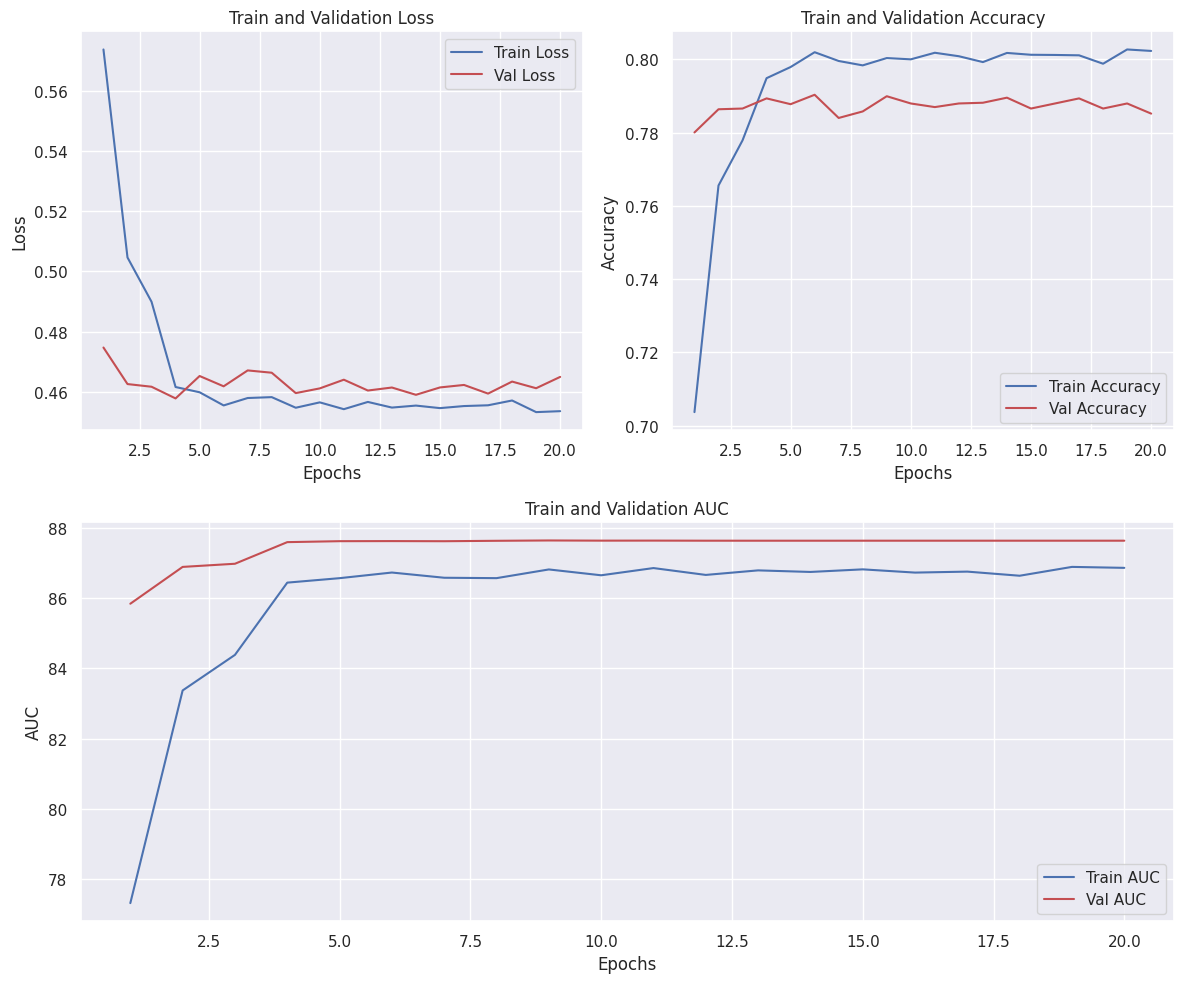

In [9]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [10]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "Y", "rot": "X"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 34.92batch/s, Epoch = 9m 32s, Loss = 0.5820|0.5021, Acc = 0.691|0.766, AUC = 76.458|85.660


Epoch 02: 34.56batch/s, Epoch = 9m 38s, Loss = 0.5056|0.4742, Acc = 0.768|0.780, AUC = 83.232|86.660


Epoch 03: 35.21batch/s, Epoch = 9m 28s, Loss = 0.4866|0.4696, Acc = 0.776|0.782, AUC = 84.667|87.267


Epoch 04: 35.14batch/s, Epoch = 9m 29s, Loss = 0.4621|0.4616, Acc = 0.793|0.790, AUC = 86.293|87.379


Epoch 05: 35.23batch/s, Epoch = 9m 27s, Loss = 0.4617|0.4678, Acc = 0.795|0.784, AUC = 86.393|87.450


Epoch 06: 35.41batch/s, Epoch = 9m 24s, Loss = 0.4592|0.4629, Acc = 0.796|0.791, AUC = 86.536|87.404


Epoch 07: 35.54batch/s, Epoch = 9m 22s, Loss = 0.4552|0.4641, Acc = 0.798|0.788, AUC = 86.806|87.468


Epoch 08: 35.11batch/s, Epoch = 9m 29s, Loss = 0.4540|0.4700, Acc = 0.799|0.783, AUC = 86.825|87.477


Epoch 09: 35.15batch/s, Epoch = 9m 28s, Loss = 0.4521|0.4659, Acc = 0.800|0.787, AUC = 86.952|87.493


Epoch 10: 35.32batch/s, Epoch = 9m 26s, Loss = 0.4539|0.4687, Acc = 0.799|0.785, AUC = 86.873|87.487


Epoch 11: 35.27batch/s, Epoch = 9m 27s, Loss = 0.4548|0.4650, Acc = 0.798|0.787, AUC = 86.809|87.484


Epoch 12: 34.70batch/s, Epoch = 9m 36s, Loss = 0.4544|0.4634, Acc = 0.801|0.787, AUC = 86.795|87.484


Epoch 13: 35.61batch/s, Epoch = 9m 21s, Loss = 0.4539|0.4661, Acc = 0.800|0.787, AUC = 86.835|87.484


Epoch 14: 35.33batch/s, Epoch = 9m 26s, Loss = 0.4571|0.4682, Acc = 0.797|0.786, AUC = 86.649|87.484


Epoch 15: 34.90batch/s, Epoch = 9m 32s, Loss = 0.4542|0.4651, Acc = 0.800|0.787, AUC = 86.836|87.484


Epoch 16: 35.49batch/s, Epoch = 9m 23s, Loss = 0.4541|0.4688, Acc = 0.802|0.784, AUC = 86.834|87.484


Epoch 17: 35.46batch/s, Epoch = 9m 24s, Loss = 0.4509|0.4646, Acc = 0.802|0.787, AUC = 87.042|87.484


Epoch 18: 34.74batch/s, Epoch = 9m 35s, Loss = 0.4528|0.4673, Acc = 0.800|0.784, AUC = 86.903|87.484


Epoch 19: 35.34batch/s, Epoch = 9m 25s, Loss = 0.4554|0.4654, Acc = 0.798|0.787, AUC = 86.751|87.484


Epoch 20: 35.56batch/s, Epoch = 9m 22s, Loss = 0.4520|0.4643, Acc = 0.801|0.787, AUC = 86.920|87.484
TOTAL TIME = 11364.89s
BEST ACC = 0.79% AT EPOCH 6
BEST AUC = 87.49 AT EPOCH 9


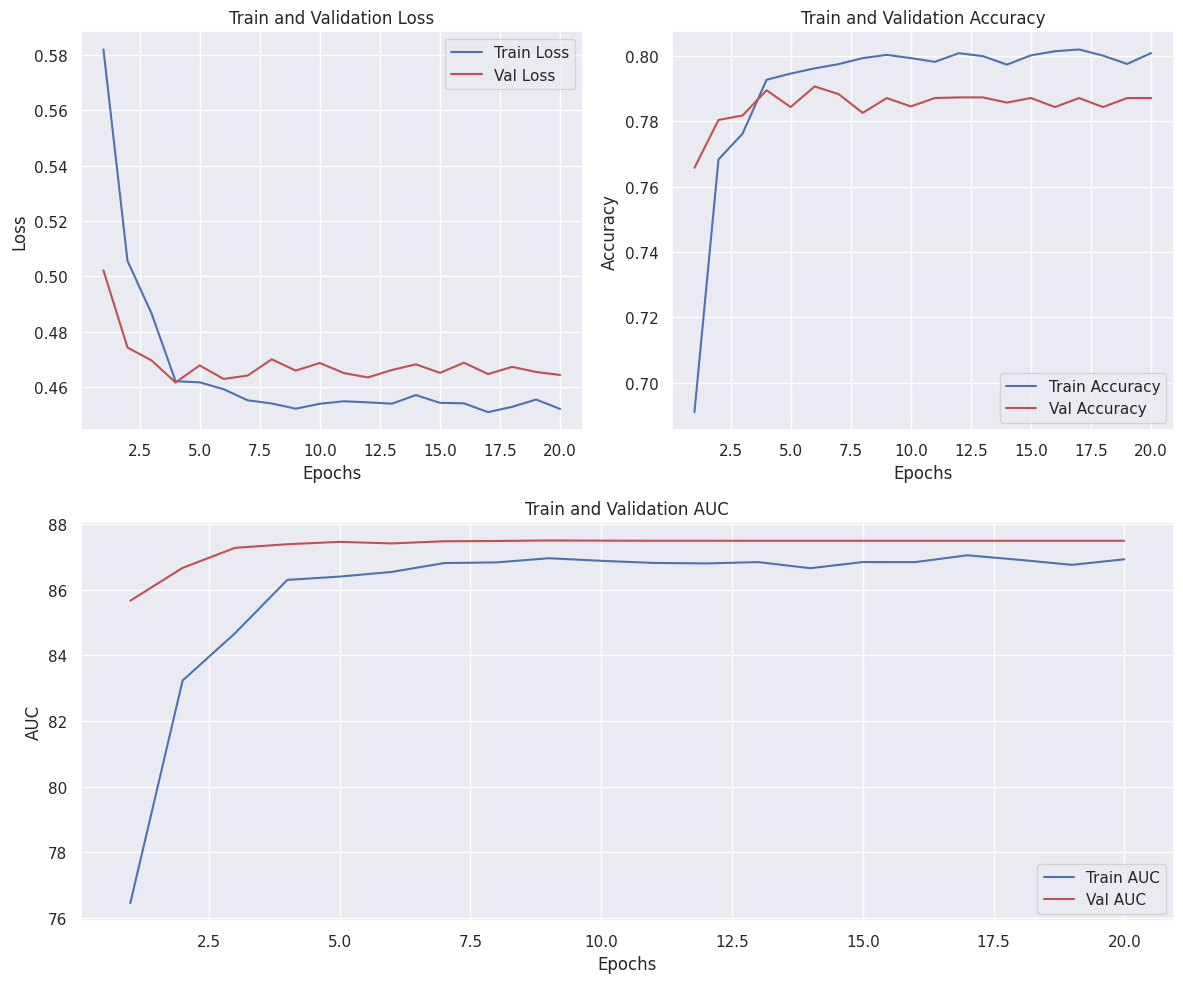

In [11]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [12]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "Z", "rot": "X"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 38.84batch/s, Epoch = 8m 34s, Loss = 0.5653|0.5056, Acc = 0.712|0.751, AUC = 78.130|86.149


Epoch 02: 38.87batch/s, Epoch = 8m 34s, Loss = 0.5038|0.4674, Acc = 0.765|0.784, AUC = 83.440|86.708


Epoch 03: 38.91batch/s, Epoch = 8m 34s, Loss = 0.4913|0.4853, Acc = 0.775|0.770, AUC = 84.344|86.637


Epoch 04: 39.08batch/s, Epoch = 8m 31s, Loss = 0.4698|0.4727, Acc = 0.794|0.787, AUC = 85.692|86.717


Epoch 05: 39.03batch/s, Epoch = 8m 32s, Loss = 0.4662|0.4804, Acc = 0.796|0.784, AUC = 86.030|87.067


Epoch 06: 39.05batch/s, Epoch = 8m 32s, Loss = 0.4663|0.4717, Acc = 0.793|0.784, AUC = 86.089|87.301


Epoch 07: 38.63batch/s, Epoch = 8m 37s, Loss = 0.4595|0.4805, Acc = 0.797|0.782, AUC = 86.562|87.349


Epoch 08: 38.50batch/s, Epoch = 8m 39s, Loss = 0.4582|0.4732, Acc = 0.798|0.787, AUC = 86.636|87.409


Epoch 09: 39.32batch/s, Epoch = 8m 28s, Loss = 0.4591|0.4671, Acc = 0.797|0.787, AUC = 86.633|87.438


Epoch 10: 39.10batch/s, Epoch = 8m 31s, Loss = 0.4578|0.4714, Acc = 0.798|0.785, AUC = 86.675|87.439


Epoch 11: 38.83batch/s, Epoch = 8m 35s, Loss = 0.4569|0.4661, Acc = 0.799|0.788, AUC = 86.725|87.443


Epoch 12: 38.39batch/s, Epoch = 8m 40s, Loss = 0.4584|0.4644, Acc = 0.798|0.790, AUC = 86.658|87.445


Epoch 13: 39.37batch/s, Epoch = 8m 28s, Loss = 0.4553|0.4647, Acc = 0.800|0.790, AUC = 86.908|87.444


Epoch 14: 39.11batch/s, Epoch = 8m 31s, Loss = 0.4580|0.4672, Acc = 0.799|0.788, AUC = 86.658|87.444


Epoch 15: 38.59batch/s, Epoch = 8m 38s, Loss = 0.4550|0.4680, Acc = 0.799|0.789, AUC = 86.939|87.444


Epoch 16: 39.06batch/s, Epoch = 8m 31s, Loss = 0.4560|0.4666, Acc = 0.799|0.789, AUC = 86.786|87.444


Epoch 17: 39.21batch/s, Epoch = 8m 30s, Loss = 0.4564|0.4643, Acc = 0.798|0.790, AUC = 86.765|87.444


Epoch 18: 39.05batch/s, Epoch = 8m 32s, Loss = 0.4582|0.4669, Acc = 0.799|0.789, AUC = 86.685|87.445


Epoch 19: 38.58batch/s, Epoch = 8m 38s, Loss = 0.4592|0.4688, Acc = 0.797|0.786, AUC = 86.650|87.445


Epoch 20: 39.27batch/s, Epoch = 8m 29s, Loss = 0.4589|0.4685, Acc = 0.798|0.789, AUC = 86.606|87.445
TOTAL TIME = 10273.12s
BEST ACC = 0.79% AT EPOCH 17
BEST AUC = 87.44 AT EPOCH 12


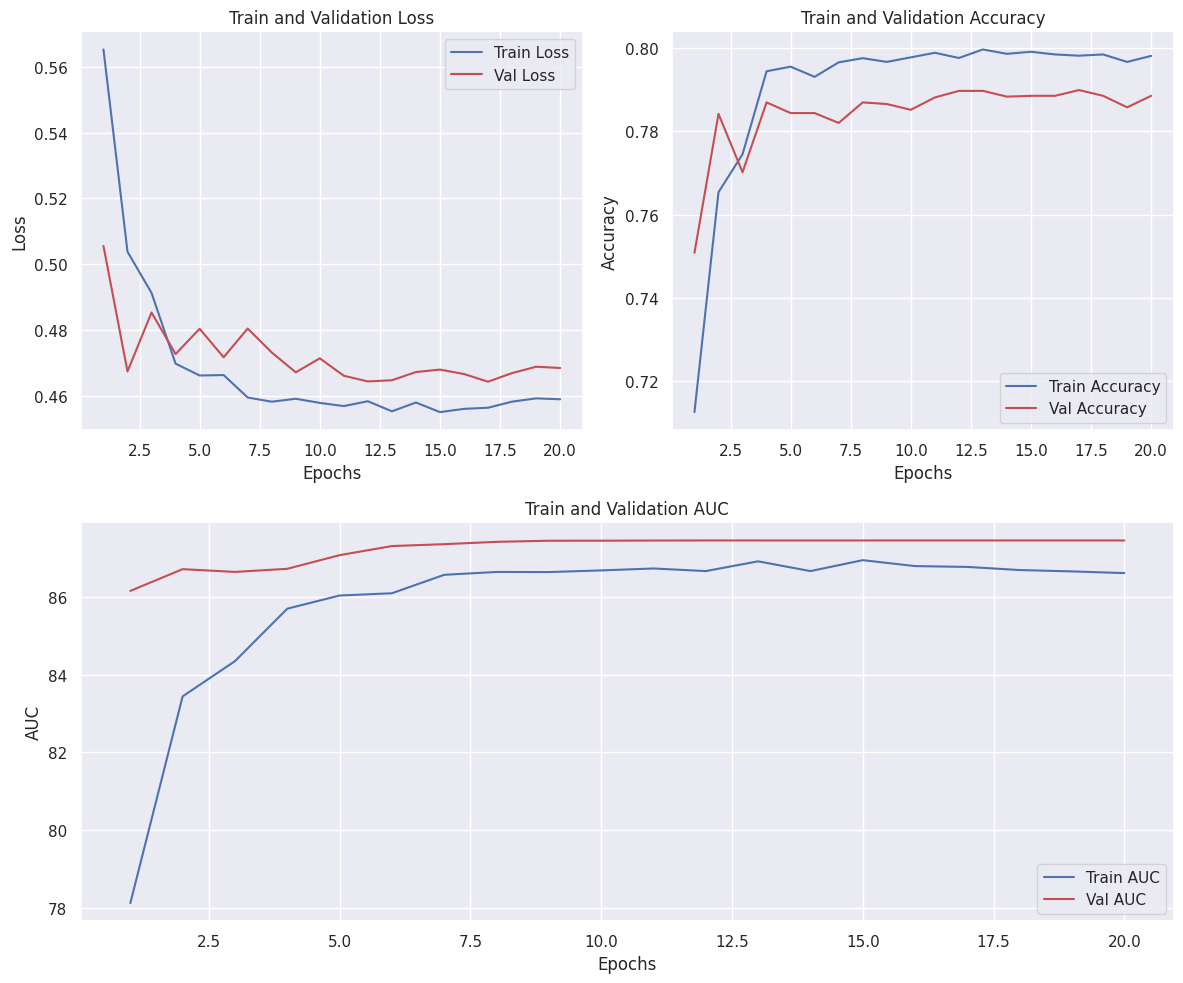

In [13]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [14]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "X", "rot": "Y"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 35.42batch/s, Epoch = 9m 24s, Loss = 0.5822|0.5014, Acc = 0.697|0.765, AUC = 76.442|85.842


Epoch 02: 35.05batch/s, Epoch = 9m 30s, Loss = 0.5052|0.4743, Acc = 0.765|0.772, AUC = 83.309|86.766


Epoch 03: 35.38batch/s, Epoch = 9m 25s, Loss = 0.4873|0.5096, Acc = 0.777|0.754, AUC = 84.586|87.412


Epoch 04: 35.34batch/s, Epoch = 9m 25s, Loss = 0.4632|0.4660, Acc = 0.797|0.784, AUC = 86.201|87.489


Epoch 05: 34.94batch/s, Epoch = 9m 32s, Loss = 0.4608|0.4650, Acc = 0.795|0.788, AUC = 86.374|87.533


Epoch 06: 35.27batch/s, Epoch = 9m 27s, Loss = 0.4587|0.4726, Acc = 0.798|0.782, AUC = 86.558|87.566


Epoch 07: 35.32batch/s, Epoch = 9m 26s, Loss = 0.4558|0.4619, Acc = 0.800|0.790, AUC = 86.676|87.584


Epoch 08: 34.98batch/s, Epoch = 9m 31s, Loss = 0.4561|0.4646, Acc = 0.801|0.787, AUC = 86.658|87.597


Epoch 09: 35.18batch/s, Epoch = 9m 28s, Loss = 0.4577|0.4605, Acc = 0.799|0.788, AUC = 86.578|87.599


Epoch 10: 35.33batch/s, Epoch = 9m 26s, Loss = 0.4551|0.4609, Acc = 0.801|0.788, AUC = 86.765|87.599


Epoch 11: 35.39batch/s, Epoch = 9m 25s, Loss = 0.4574|0.4660, Acc = 0.802|0.784, AUC = 86.566|87.599


Epoch 12: 35.06batch/s, Epoch = 9m 30s, Loss = 0.4565|0.4637, Acc = 0.799|0.787, AUC = 86.682|87.598


Epoch 13: 35.21batch/s, Epoch = 9m 28s, Loss = 0.4544|0.4605, Acc = 0.801|0.789, AUC = 86.822|87.598


Epoch 14: 35.34batch/s, Epoch = 9m 25s, Loss = 0.4572|0.4657, Acc = 0.799|0.785, AUC = 86.585|87.597


Epoch 15: 35.12batch/s, Epoch = 9m 29s, Loss = 0.4544|0.4647, Acc = 0.803|0.785, AUC = 86.774|87.597


Epoch 16: 35.51batch/s, Epoch = 9m 23s, Loss = 0.4557|0.4603, Acc = 0.801|0.789, AUC = 86.731|87.597


Epoch 17: 35.38batch/s, Epoch = 9m 25s, Loss = 0.4554|0.4641, Acc = 0.802|0.786, AUC = 86.683|87.597


Epoch 18: 34.93batch/s, Epoch = 9m 32s, Loss = 0.4530|0.4659, Acc = 0.802|0.785, AUC = 86.891|87.597


Epoch 19: 35.04batch/s, Epoch = 9m 30s, Loss = 0.4570|0.4659, Acc = 0.801|0.785, AUC = 86.572|87.597


Epoch 20: 35.45batch/s, Epoch = 9m 24s, Loss = 0.4566|0.4626, Acc = 0.798|0.788, AUC = 86.648|87.597
TOTAL TIME = 11353.83s
BEST ACC = 0.79% AT EPOCH 7
BEST AUC = 87.60 AT EPOCH 10


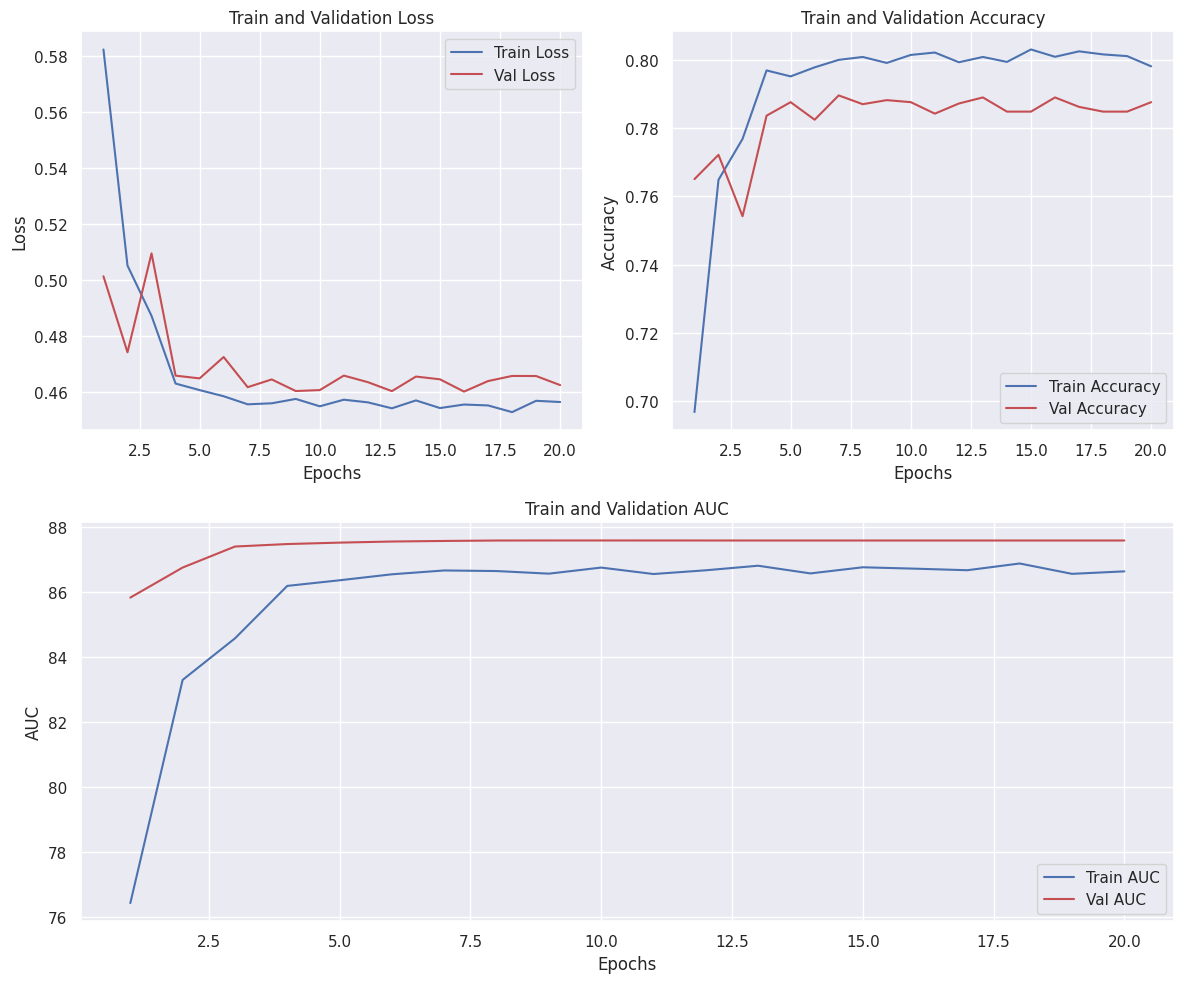

In [15]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [16]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "Y", "rot": "Y"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 35.21batch/s, Epoch = 9m 27s, Loss = 0.5849|0.5047, Acc = 0.688|0.763, AUC = 75.860|86.007


Epoch 02: 35.25batch/s, Epoch = 9m 27s, Loss = 0.5049|0.4822, Acc = 0.766|0.777, AUC = 83.285|86.444


Epoch 03: 35.21batch/s, Epoch = 9m 28s, Loss = 0.4891|0.4678, Acc = 0.775|0.779, AUC = 84.457|87.202


Epoch 04: 35.01batch/s, Epoch = 9m 31s, Loss = 0.4667|0.4733, Acc = 0.793|0.789, AUC = 85.985|87.228


Epoch 05: 35.12batch/s, Epoch = 9m 29s, Loss = 0.4598|0.4684, Acc = 0.798|0.787, AUC = 86.467|87.336


Epoch 06: 35.17batch/s, Epoch = 9m 28s, Loss = 0.4586|0.4705, Acc = 0.798|0.781, AUC = 86.525|87.403


Epoch 07: 35.28batch/s, Epoch = 9m 26s, Loss = 0.4552|0.4731, Acc = 0.802|0.781, AUC = 86.729|87.436


Epoch 08: 35.15batch/s, Epoch = 9m 29s, Loss = 0.4552|0.4675, Acc = 0.802|0.785, AUC = 86.724|87.438


Epoch 09: 35.28batch/s, Epoch = 9m 26s, Loss = 0.4549|0.4668, Acc = 0.801|0.785, AUC = 86.778|87.436


Epoch 10: 35.28batch/s, Epoch = 9m 26s, Loss = 0.4544|0.4663, Acc = 0.803|0.787, AUC = 86.780|87.439


Epoch 11: 34.95batch/s, Epoch = 9m 32s, Loss = 0.4556|0.4705, Acc = 0.800|0.785, AUC = 86.713|87.438


Epoch 12: 35.10batch/s, Epoch = 9m 29s, Loss = 0.4538|0.4675, Acc = 0.805|0.786, AUC = 86.760|87.436


Epoch 13: 35.57batch/s, Epoch = 9m 22s, Loss = 0.4558|0.4704, Acc = 0.801|0.783, AUC = 86.681|87.436


Epoch 14: 34.97batch/s, Epoch = 9m 31s, Loss = 0.4575|0.4663, Acc = 0.800|0.786, AUC = 86.603|87.436


Epoch 15: 35.48batch/s, Epoch = 9m 23s, Loss = 0.4569|0.4666, Acc = 0.799|0.785, AUC = 86.605|87.436


Epoch 16: 35.18batch/s, Epoch = 9m 28s, Loss = 0.4578|0.4674, Acc = 0.800|0.786, AUC = 86.564|87.436


Epoch 17: 34.92batch/s, Epoch = 9m 32s, Loss = 0.4541|0.4645, Acc = 0.803|0.787, AUC = 86.773|87.436


Epoch 18: 35.37batch/s, Epoch = 9m 25s, Loss = 0.4555|0.4664, Acc = 0.800|0.786, AUC = 86.755|87.436


Epoch 19: 35.51batch/s, Epoch = 9m 23s, Loss = 0.4541|0.4670, Acc = 0.800|0.786, AUC = 86.866|87.436


Epoch 20: 35.05batch/s, Epoch = 9m 30s, Loss = 0.4533|0.4647, Acc = 0.802|0.787, AUC = 86.901|87.436
TOTAL TIME = 11363.16s
BEST ACC = 0.79% AT EPOCH 4
BEST AUC = 87.44 AT EPOCH 10


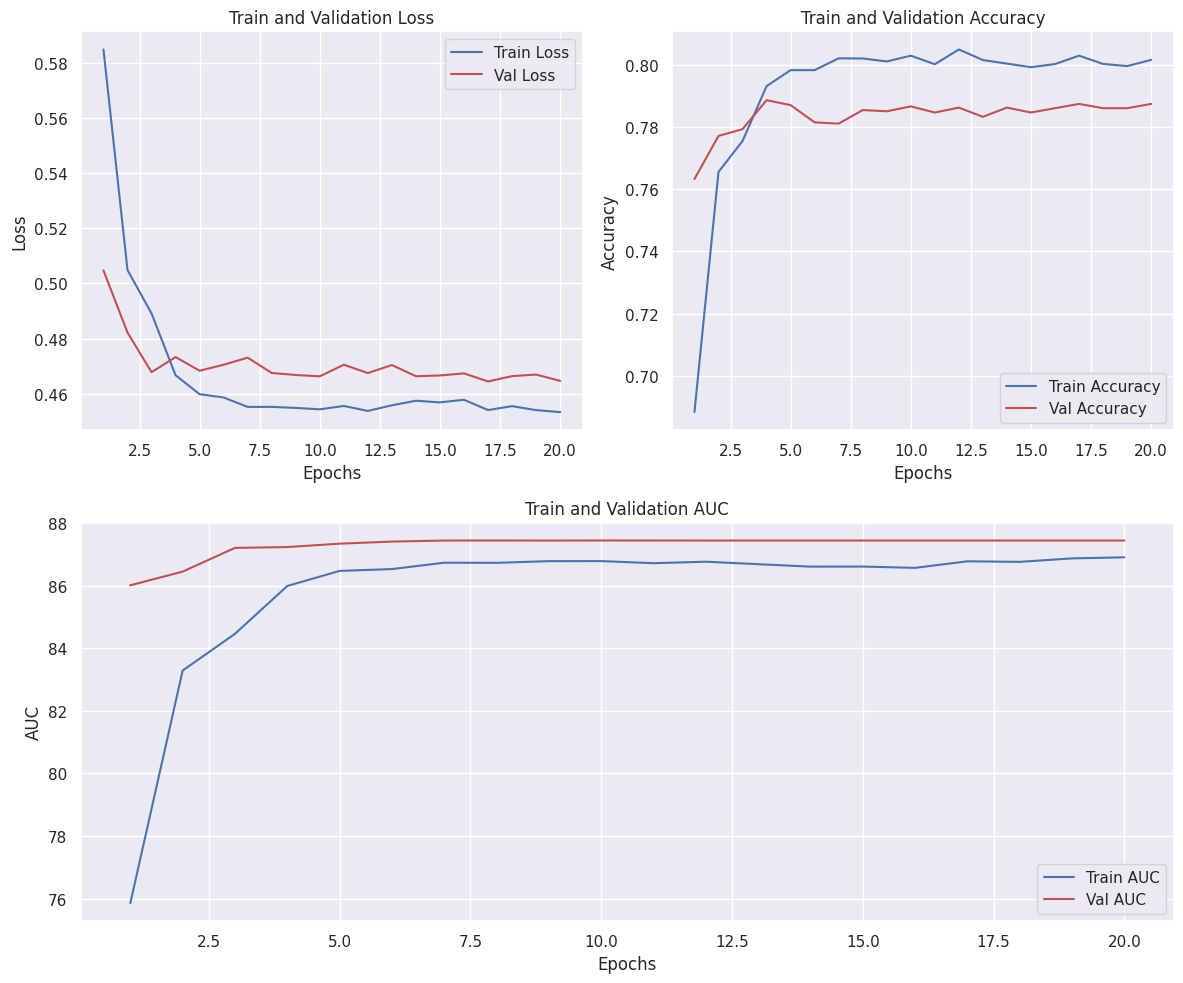

In [17]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [18]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "Z", "rot": "Y"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 39.25batch/s, Epoch = 8m 29s, Loss = 0.5925|0.4831, Acc = 0.681|0.779, AUC = 74.982|85.755


Epoch 02: 39.08batch/s, Epoch = 8m 31s, Loss = 0.5049|0.4824, Acc = 0.767|0.775, AUC = 83.353|86.478


Epoch 03: 39.11batch/s, Epoch = 8m 31s, Loss = 0.4885|0.4767, Acc = 0.778|0.771, AUC = 84.577|87.077


Epoch 04: 38.90batch/s, Epoch = 8m 34s, Loss = 0.4635|0.4722, Acc = 0.795|0.788, AUC = 86.192|87.232


Epoch 05: 39.26batch/s, Epoch = 8m 29s, Loss = 0.4604|0.4848, Acc = 0.796|0.781, AUC = 86.392|87.311


Epoch 06: 39.25batch/s, Epoch = 8m 29s, Loss = 0.4618|0.4667, Acc = 0.796|0.788, AUC = 86.313|87.293


Epoch 07: 38.93batch/s, Epoch = 8m 33s, Loss = 0.4594|0.4719, Acc = 0.797|0.786, AUC = 86.590|87.319


Epoch 08: 38.96batch/s, Epoch = 8m 33s, Loss = 0.4570|0.4685, Acc = 0.798|0.787, AUC = 86.671|87.349


Epoch 09: 39.04batch/s, Epoch = 8m 32s, Loss = 0.4556|0.4753, Acc = 0.799|0.784, AUC = 86.774|87.361


Epoch 10: 38.96batch/s, Epoch = 8m 33s, Loss = 0.4561|0.4706, Acc = 0.801|0.786, AUC = 86.667|87.361


Epoch 11: 38.75batch/s, Epoch = 8m 36s, Loss = 0.4567|0.4689, Acc = 0.801|0.788, AUC = 86.629|87.363


Epoch 12: 39.03batch/s, Epoch = 8m 32s, Loss = 0.4553|0.4715, Acc = 0.801|0.786, AUC = 86.761|87.364


Epoch 13: 39.20batch/s, Epoch = 8m 30s, Loss = 0.4577|0.4679, Acc = 0.800|0.789, AUC = 86.573|87.364


Epoch 14: 39.20batch/s, Epoch = 8m 30s, Loss = 0.4574|0.4696, Acc = 0.799|0.787, AUC = 86.602|87.365


Epoch 15: 39.48batch/s, Epoch = 8m 26s, Loss = 0.4560|0.4712, Acc = 0.799|0.786, AUC = 86.696|87.364


Epoch 16: 39.40batch/s, Epoch = 8m 27s, Loss = 0.4558|0.4731, Acc = 0.799|0.784, AUC = 86.741|87.364


Epoch 17: 39.22batch/s, Epoch = 8m 29s, Loss = 0.4572|0.4710, Acc = 0.800|0.787, AUC = 86.629|87.364


Epoch 18: 38.98batch/s, Epoch = 8m 33s, Loss = 0.4583|0.4712, Acc = 0.800|0.786, AUC = 86.497|87.364


Epoch 19: 39.11batch/s, Epoch = 8m 31s, Loss = 0.4571|0.4726, Acc = 0.800|0.784, AUC = 86.634|87.364


Epoch 20: 39.08batch/s, Epoch = 8m 31s, Loss = 0.4570|0.4713, Acc = 0.797|0.786, AUC = 86.645|87.364
TOTAL TIME = 10228.30s
BEST ACC = 0.79% AT EPOCH 13
BEST AUC = 87.36 AT EPOCH 14


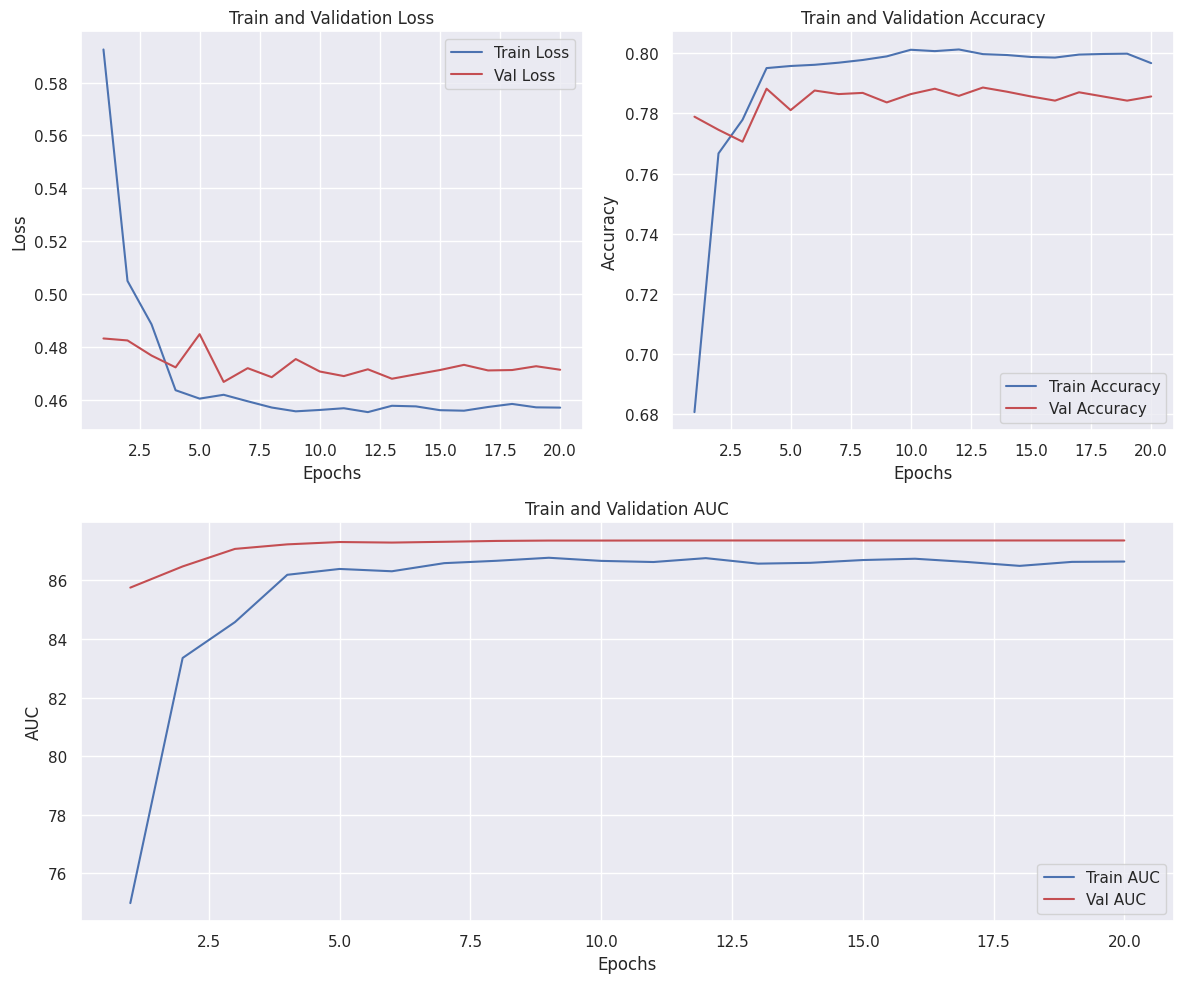

In [19]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [20]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "X", "rot": "Z"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 42.19batch/s, Epoch = 7m 54s, Loss = 0.5860|0.4716, Acc = 0.690|0.786, AUC = 75.986|86.386


Epoch 02: 42.94batch/s, Epoch = 7m 45s, Loss = 0.4948|0.4537, Acc = 0.773|0.787, AUC = 84.069|87.573


Epoch 03: 42.81batch/s, Epoch = 7m 47s, Loss = 0.4744|0.4634, Acc = 0.784|0.789, AUC = 85.512|87.869


Epoch 04: 42.58batch/s, Epoch = 7m 49s, Loss = 0.4502|0.4514, Acc = 0.800|0.795, AUC = 87.117|88.011


Epoch 05: 41.85batch/s, Epoch = 7m 57s, Loss = 0.4494|0.4525, Acc = 0.801|0.789, AUC = 87.180|88.111


Epoch 06: 42.99batch/s, Epoch = 7m 45s, Loss = 0.4501|0.4545, Acc = 0.804|0.791, AUC = 87.121|88.139


Epoch 07: 43.14batch/s, Epoch = 7m 43s, Loss = 0.4451|0.4493, Acc = 0.804|0.795, AUC = 87.421|88.163


Epoch 08: 43.08batch/s, Epoch = 7m 44s, Loss = 0.4461|0.4523, Acc = 0.805|0.794, AUC = 87.333|88.162


Epoch 09: 42.40batch/s, Epoch = 7m 51s, Loss = 0.4433|0.4509, Acc = 0.806|0.792, AUC = 87.486|88.169


Epoch 10: 43.30batch/s, Epoch = 7m 41s, Loss = 0.4440|0.4532, Acc = 0.806|0.792, AUC = 87.469|88.168


Epoch 11: 42.94batch/s, Epoch = 7m 45s, Loss = 0.4438|0.4533, Acc = 0.804|0.792, AUC = 87.499|88.169


Epoch 12: 43.08batch/s, Epoch = 7m 44s, Loss = 0.4432|0.4503, Acc = 0.806|0.795, AUC = 87.527|88.169


Epoch 13: 42.53batch/s, Epoch = 7m 50s, Loss = 0.4443|0.4507, Acc = 0.805|0.793, AUC = 87.475|88.169


Epoch 14: 43.16batch/s, Epoch = 7m 43s, Loss = 0.4454|0.4563, Acc = 0.805|0.789, AUC = 87.360|88.169


Epoch 15: 42.96batch/s, Epoch = 7m 45s, Loss = 0.4438|0.4521, Acc = 0.806|0.794, AUC = 87.458|88.169


Epoch 16: 42.85batch/s, Epoch = 7m 46s, Loss = 0.4422|0.4521, Acc = 0.807|0.794, AUC = 87.572|88.169


Epoch 17: 42.16batch/s, Epoch = 7m 54s, Loss = 0.4453|0.4478, Acc = 0.805|0.796, AUC = 87.380|88.169


Epoch 18: 43.07batch/s, Epoch = 7m 44s, Loss = 0.4429|0.4502, Acc = 0.805|0.795, AUC = 87.550|88.169


Epoch 19: 42.98batch/s, Epoch = 7m 45s, Loss = 0.4434|0.4537, Acc = 0.807|0.794, AUC = 87.491|88.169


Epoch 20: 42.59batch/s, Epoch = 7m 49s, Loss = 0.4423|0.4488, Acc = 0.806|0.795, AUC = 87.598|88.169
TOTAL TIME = 9351.06s
BEST ACC = 0.80% AT EPOCH 17
BEST AUC = 88.17 AT EPOCH 13


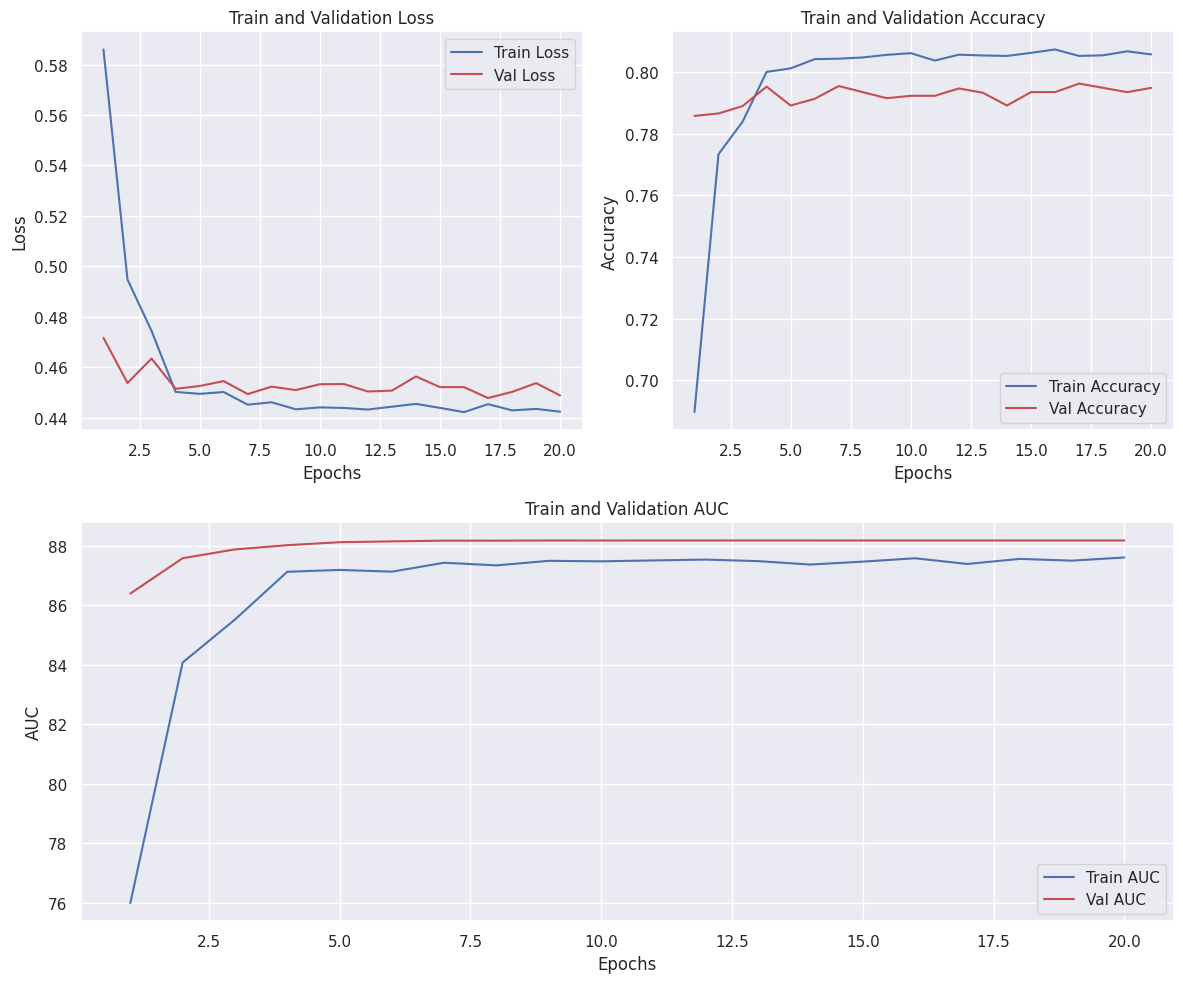

In [21]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [22]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "Y", "rot": "Z"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 42.24batch/s, Epoch = 7m 53s, Loss = 0.5742|0.4675, Acc = 0.702|0.785, AUC = 77.165|86.601


Epoch 02: 43.14batch/s, Epoch = 7m 43s, Loss = 0.5027|0.4948, Acc = 0.769|0.773, AUC = 83.401|87.434


Epoch 03: 43.12batch/s, Epoch = 7m 43s, Loss = 0.4812|0.4537, Acc = 0.781|0.793, AUC = 85.053|87.393


Epoch 04: 42.73batch/s, Epoch = 7m 48s, Loss = 0.4592|0.4669, Acc = 0.797|0.790, AUC = 86.558|87.754


Epoch 05: 42.97batch/s, Epoch = 7m 45s, Loss = 0.4554|0.4635, Acc = 0.797|0.791, AUC = 86.794|87.807


Epoch 06: 43.19batch/s, Epoch = 7m 43s, Loss = 0.4563|0.4587, Acc = 0.800|0.792, AUC = 86.681|87.863


Epoch 07: 42.92batch/s, Epoch = 7m 45s, Loss = 0.4532|0.4633, Acc = 0.799|0.793, AUC = 86.937|87.889


Epoch 08: 42.23batch/s, Epoch = 7m 53s, Loss = 0.4502|0.4629, Acc = 0.800|0.791, AUC = 87.139|87.896


Epoch 09: 42.26batch/s, Epoch = 7m 53s, Loss = 0.4505|0.4572, Acc = 0.802|0.796, AUC = 87.084|87.920


Epoch 10: 42.77batch/s, Epoch = 7m 47s, Loss = 0.4494|0.4562, Acc = 0.801|0.796, AUC = 87.162|87.919


Epoch 11: 42.83batch/s, Epoch = 7m 46s, Loss = 0.4494|0.4563, Acc = 0.805|0.795, AUC = 87.104|87.921


Epoch 12: 42.00batch/s, Epoch = 7m 56s, Loss = 0.4493|0.4578, Acc = 0.804|0.792, AUC = 87.120|87.922


Epoch 13: 42.62batch/s, Epoch = 7m 49s, Loss = 0.4510|0.4574, Acc = 0.802|0.795, AUC = 87.029|87.922


Epoch 14: 42.51batch/s, Epoch = 7m 50s, Loss = 0.4488|0.4547, Acc = 0.804|0.794, AUC = 87.159|87.921


Epoch 15: 42.94batch/s, Epoch = 7m 45s, Loss = 0.4485|0.4570, Acc = 0.804|0.794, AUC = 87.148|87.922


Epoch 16: 42.47batch/s, Epoch = 7m 50s, Loss = 0.4484|0.4567, Acc = 0.804|0.793, AUC = 87.226|87.922


Epoch 17: 43.04batch/s, Epoch = 7m 44s, Loss = 0.4514|0.4560, Acc = 0.800|0.794, AUC = 87.054|87.922


Epoch 18: 42.89batch/s, Epoch = 7m 46s, Loss = 0.4487|0.4576, Acc = 0.805|0.792, AUC = 87.158|87.922


Epoch 19: 42.65batch/s, Epoch = 7m 48s, Loss = 0.4491|0.4564, Acc = 0.803|0.793, AUC = 87.187|87.922


Epoch 20: 42.28batch/s, Epoch = 7m 52s, Loss = 0.4486|0.4542, Acc = 0.805|0.796, AUC = 87.225|87.922
TOTAL TIME = 9370.52s
BEST ACC = 0.80% AT EPOCH 9
BEST AUC = 87.92 AT EPOCH 19


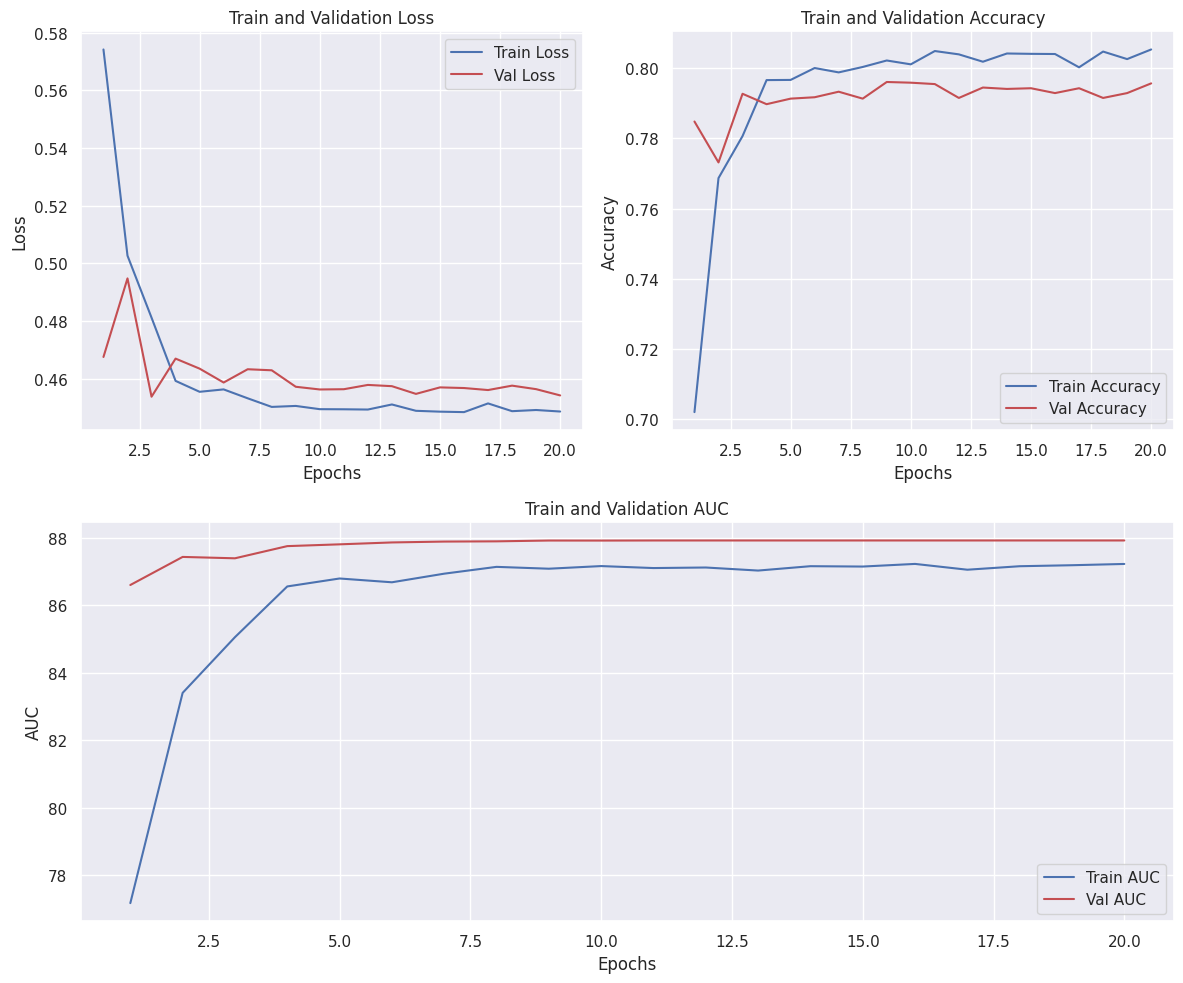

In [23]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)

In [24]:
train_loss, train_acc, val_loss, val_acc, train_auc, val_auc, best_dict = main(
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    test_dataloader=test_dataloader,
    n_epochs=20,
    sample_size=0,
    batch_size=64,
    embed_dim=8,
    num_heads=2,
    num_blocks=2,
    n_qubits_transformer=8,
    n_qubits_ffn=8,
    n_qlayers=3,
    tqdm_disabled=True,
    q_device="default.qubit.torch",
    batch=True,
    circuit_type="pennylane",
    pennylane_args={"angle_rot": "Z", "rot": "Z"},
)

quantum_pl_gpu_metrics_batch = {
    "train_loss": train_loss,
    "train_acc": train_acc,
    "val_loss": val_loss,
    "val_acc": val_acc,
    "train_auc": train_auc,
    "val_auc": val_auc,
    "best_dict": best_dict,
}

++ There will be 2 transformer blocks
++ Transformer will use 8 qubits and 3 q layers
The feed-forward head will use 8 qubits
Using PennyLane quantum device default.qubit.torch
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
weight_shapes = (n_qlayers, n_qubits) = (3, 8)
The model has 6,769 trainable parameters


/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_torch.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
/group/pmc026/nchoong/qt/lib/python3.11/site-packages/pennylane/devices/default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.torch' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(


Epoch 01: 48.10batch/s, Epoch = 6m 55s, Loss = 0.5753|0.4761, Acc = 0.700|0.780, AUC = 77.074|85.989


Epoch 02: 47.94batch/s, Epoch = 6m 57s, Loss = 0.5060|0.4887, Acc = 0.766|0.784, AUC = 83.238|86.479


Epoch 03: 48.28batch/s, Epoch = 6m 54s, Loss = 0.4895|0.4672, Acc = 0.774|0.784, AUC = 84.532|87.154


Epoch 04: 47.43batch/s, Epoch = 7m 1s, Loss = 0.4659|0.4786, Acc = 0.794|0.784, AUC = 86.109|87.297


Epoch 05: 47.92batch/s, Epoch = 6m 57s, Loss = 0.4626|0.4665, Acc = 0.795|0.787, AUC = 86.319|87.368


Epoch 06: 47.10batch/s, Epoch = 7m 4s, Loss = 0.4663|0.4695, Acc = 0.790|0.788, AUC = 86.126|87.395


Epoch 07: 48.07batch/s, Epoch = 6m 56s, Loss = 0.4593|0.4703, Acc = 0.798|0.788, AUC = 86.540|87.389


Epoch 08: 47.89batch/s, Epoch = 6m 57s, Loss = 0.4577|0.4673, Acc = 0.799|0.787, AUC = 86.553|87.397


Epoch 09: 47.49batch/s, Epoch = 7m 1s, Loss = 0.4580|0.4686, Acc = 0.800|0.786, AUC = 86.590|87.391


Epoch 10: 47.83batch/s, Epoch = 6m 58s, Loss = 0.4578|0.4745, Acc = 0.800|0.782, AUC = 86.559|87.393


Epoch 11: 47.85batch/s, Epoch = 6m 57s, Loss = 0.4586|0.4671, Acc = 0.801|0.787, AUC = 86.450|87.393


Epoch 12: 47.20batch/s, Epoch = 7m 3s, Loss = 0.4578|0.4680, Acc = 0.801|0.786, AUC = 86.564|87.395


Epoch 13: 47.33batch/s, Epoch = 7m 2s, Loss = 0.4554|0.4719, Acc = 0.800|0.785, AUC = 86.785|87.396


Epoch 14: 47.37batch/s, Epoch = 7m 2s, Loss = 0.4556|0.4674, Acc = 0.801|0.786, AUC = 86.704|87.396


Epoch 15: 47.79batch/s, Epoch = 6m 58s, Loss = 0.4604|0.4741, Acc = 0.799|0.783, AUC = 86.416|87.396


Epoch 16: 48.33batch/s, Epoch = 6m 53s, Loss = 0.4570|0.4711, Acc = 0.802|0.785, AUC = 86.616|87.396


Epoch 17: 47.61batch/s, Epoch = 7m 0s, Loss = 0.4601|0.4675, Acc = 0.798|0.786, AUC = 86.400|87.397


Epoch 18: 47.89batch/s, Epoch = 6m 57s, Loss = 0.4562|0.4688, Acc = 0.799|0.786, AUC = 86.637|87.397


Epoch 19: 47.83batch/s, Epoch = 6m 58s, Loss = 0.4592|0.4689, Acc = 0.799|0.785, AUC = 86.505|87.397


Epoch 20: 48.05batch/s, Epoch = 6m 56s, Loss = 0.4601|0.4671, Acc = 0.798|0.787, AUC = 86.408|87.397
TOTAL TIME = 8374.88s
BEST ACC = 0.79% AT EPOCH 6
BEST AUC = 87.40 AT EPOCH 8


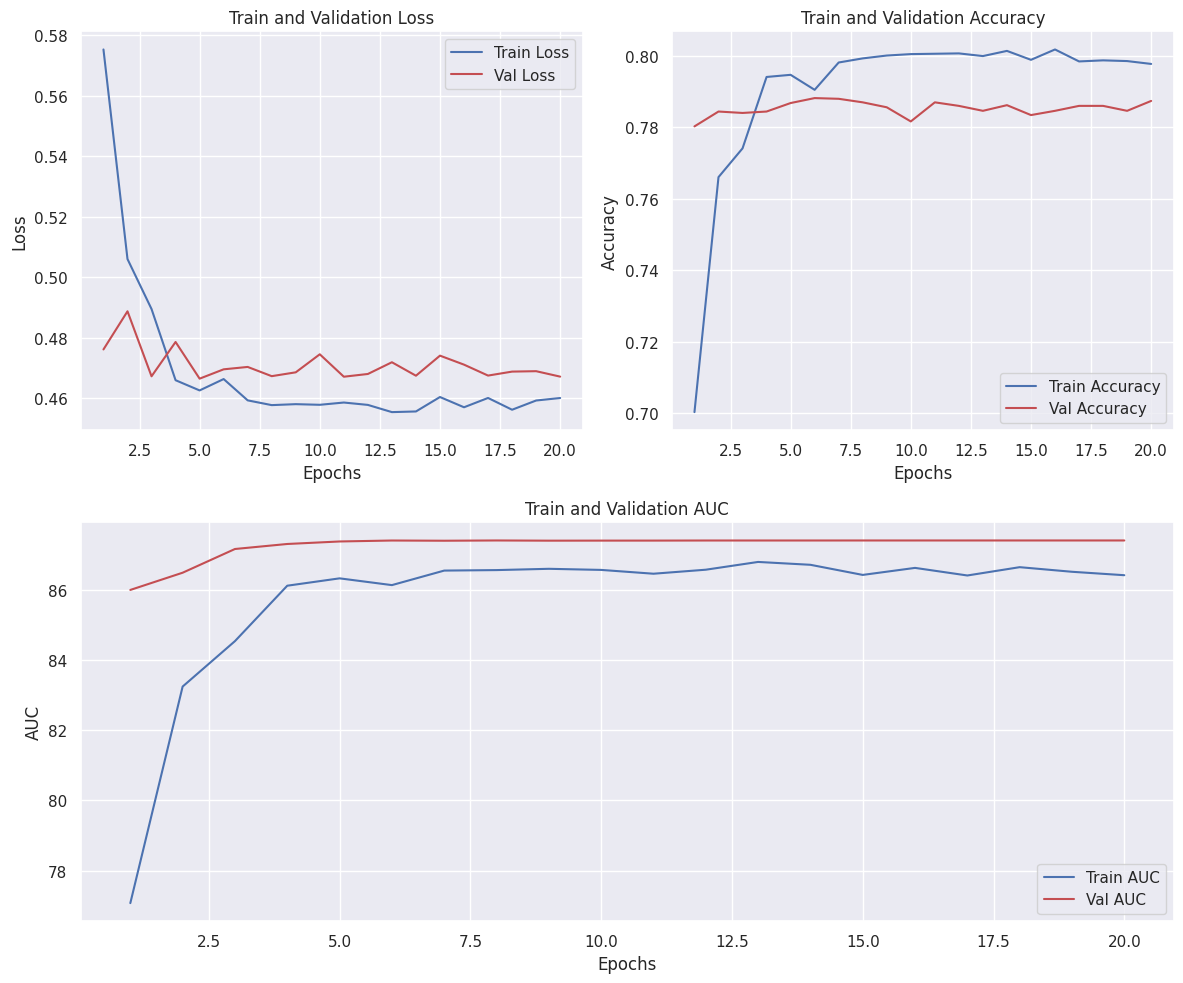

In [25]:
plot_metrics(train_loss, val_loss, train_acc, val_acc, train_auc, val_auc)